In [1]:
# Useful information stack...


# Just change your input shape to shape=(n_channels, None, None). Where n_channels is the number of channels in your input image.

### Test for individual cell 

* Grayscale image to RGB for transfer learning
* next.. 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

import glob
import imageio
import time
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
from platform import python_version
print("python version :", python_version()) # linux : 3.7.9
print("tensorflow version :" , tf.__version__)  # linux : 2.3.0
print("keras version : ", keras.__version__) # linux : 2.4.0

python version : 3.7.9
tensorflow version : 2.3.0
keras version :  2.4.0


In [20]:
# toolbar_width = 40
# # setup toolbar
# sys.stdout.write("[%s]" % (" " * toolbar_width))
# sys.stdout.flush()
# sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

# for i in xrange(toolbar_width):
#     time.sleep(0.1)
#     #update the bar
#     sys.stdout.write("-")
#     sys.stdout.flush()
    
# sys.stdout.write("]\n") # this ends the progress var

from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(0.3)

100%|██████████| 10/10 [00:03<00:00,  3.31it/s]


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [23]:
img_check_path = '../data_single/data_individual_converted/par1/par1b1_s_001.jpg'
img_check = imageio.imread(img_check_path)
print("image shape : ", img_check.shape)
print("image type : ", type(img_check))
# imageio.core.util.Array is a subclass of the NumPy array, 
# so it is correct to say that imread returns a NumPy array. 

image shape :  (500, 500)
image type :  <class 'imageio.core.util.Array'>


In [24]:
# input image can have any size

# img_height=None
# img_width=None
img_height=300
img_width=300
batch_size=32

In [25]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
        '../data_single/data_individual_converted/', labels='inferred', label_mode=None,
        validation_split=0.2, subset='training',
        seed=1337, image_size=(img_height, img_width),
        batch_size=batch_size        
        )

Found 670 files belonging to 2 classes.
Using 536 files for training.


In [26]:
val_data=tf.keras.preprocessing.image_dataset_from_directory(
        '../data_single/data_individual_converted/', labels='inferred', label_mode=None,
        validation_split=0.2, subset='validation',
        seed=1337, image_size=(img_height, img_width),
        batch_size=batch_size        
        )

Found 670 files belonging to 2 classes.
Using 134 files for validation.


In [27]:
class_names = train_data.class_names
print(class_names)

['par1', 'wt']


In [28]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [30]:
train_data.take(1)

<TakeDataset shapes: (None, 300, 300, 3), types: tf.float32>

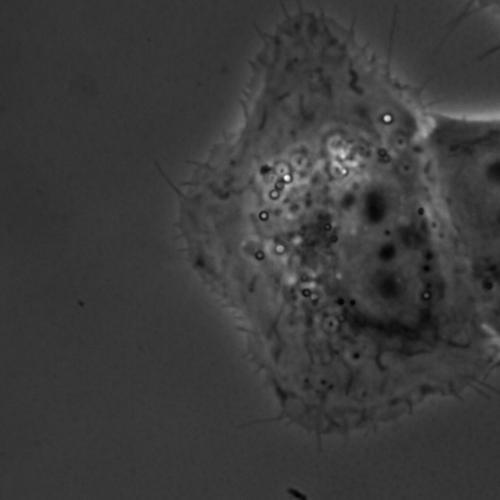

In [35]:
img_check2 = tf.keras.preprocessing.image.load_img(img_check_path)
img_check2

In [37]:
type(img_check2)

PIL.Image.Image

In [45]:
input_arr = keras.preprocessing.image.img_to_array(img_check2)
# input_arr = np.array([input_arr]) # convert single image to a batch
# prediction = model.predict(input_arr)
input_arr = np.array(input_arr) 
# input_arr.shape
# input_arr
input_arr_collapsed = np.mean(input_arr, axis=-1, keepdims=True)
input_arr_collapsed.shape

(500, 500, 1)

In [47]:
input_arr_all = keras.preprocessing.image.img_to_array(train_data.take(1))
input_arr_all = np.array(input_arr_all)
input_arr_all.shape

TypeError: float() argument must be a string or a number, not 'TakeDataset'

In [33]:
### Visualize dataset

# plt.figure(figsize=(10,10))
# for images, labels in zip(train_data.take(1)):
#     for i in range(9):
#         ax = plt.subplot(3,3, i+1)
#         plt.imshow(images[i].numpy.astype("uint8"))
#         plt.axis("off")

train_data.head()

AttributeError: 'BatchDataset' object has no attribute 'head'

In [54]:
for labels, images in enumerate(train_data.take(1)):
    images_array = np.array(images)
    images_ext = images_array[labels, ...]
    print(images_ext.shape)
    imageio.imread(images_ext)
    
#     images_squeezed = np.squeeze(images_array)
#     print(images_squeezed.shape)
#     imageio.imread(np.squeeze(images))

(300, 300, 3)


OSError: Cannot understand given URI: array([[[24.      , 24.      , 24.      ],
        [24.  ....

In [58]:
for labels, images in enumerate(train_data.take(1)):
    print(labels)
    print(images.shape)

0
(32, 300, 300, 3)


In [56]:
plt.figure(figsize=(10,10))

for images,labels in train_data.take(3):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

InvalidArgumentError: assertion failed: [Unable to decode bytes as JPEG, PNG, GIF, or BMP]
	 [[{{node decode_image/cond_jpeg/else/_1/decode_image/cond_jpeg/cond_png/else/_20/decode_image/cond_jpeg/cond_png/cond_gif/else/_39/decode_image/cond_jpeg/cond_png/cond_gif/Assert/Assert}}]]

<Figure size 720x720 with 0 Axes>